In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import Analysis

In [7]:
analysis = Analysis(basepath=basepath)

In [8]:
analysis.load_data()

In [9]:
analysis.load_weeks(1)

In [10]:
analysis.weeks.keys()

dict_keys(['week1'])

In [11]:
analysis.process_games()

In [12]:
analysis.process_teams()

PHI - week1


/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

CLE - week1
IND - week1
MIA - week1
BAL - week1
NE - week1
NYG - week1
NO - week1
ARI - week1
CAR - week1
GB - week1
DET - week1
OAK - week1
CIN - week1
NYJ - week1
BUF - week1
ATL - week1
PIT - week1
WAS - week1
TEN - week1
TB - week1
SF - week1
LA - week1
DEN - week1
JAX - week1
DAL - week1
CHI - week1
HOU - week1
KC - week1
MIN - week1
SEA - week1
LAC - week1


In [44]:
team = analysis.teams['CIN']

In [45]:
game = team.games['week1']

In [46]:
game.list_plays()

Play 1: (13:18) (Shotgun) A.Luck pass short left intended for J.Doyle INTERCEPTED by P.Brown at CIN 5. P.Brown to CIN 7 for 2 yards (N.Hines).
Play 2: (8:20) (Shotgun) A.Luck pass short right to R.Grant to IND 28 for 3 yards (D.Kirkpatrick).
Play 3: (7:09) (Shotgun) A.Luck pass short right to R.Grant to IND 46 for 6 yards (P.Brown).
Play 4: (6:03) (Shotgun) A.Luck pass short middle to C.Rogers to CIN 44 for 8 yards (P.Brown).
Play 5: (5:27) (Shotgun) A.Luck pass short right to C.Rogers to CIN 41 for 3 yards (J.Bates).
Play 6: (4:51) (Shotgun) A.Luck pass short middle to R.Grant to CIN 28 for 13 yards (S.Williams).
Play 7: (2:49) (Shotgun) A.Luck pass incomplete short middle to E.Ebron [G.Atkins].
Play 8: (2:44) (Shotgun) A.Luck pass short left to J.Wilkins to CIN 1 for 8 yards (W.Jackson).
Play 9: (:04) (Shotgun) A.Luck pass short left to T.Hilton ran ob at IND 49 for 7 yards.
Play 10: (14:04) (Shotgun) A.Luck pass incomplete short middle to T.Hilton (D.Dennard).
Play 11: (13:59) A.Luc

In [16]:
for play in game.plays:
    play.determine_target()

In [17]:
for i in range(len(game.plays)):
    print(f'Play {i+1}: {game.plays[i].target}')

Play 1: Delanie Walker
Play 2: Corey Davis
Play 3: Corey Davis
Play 4: Taywan Taylor
Play 5: Corey Davis
Play 6: Tajae Sharpe
Play 7: Derrick Henry
Play 8: Luke Stocker
Play 9: Delanie Walker
Play 10: Corey Davis
Play 11: Corey Davis
Play 12: Dion Lewis
Play 13: Corey Davis
Play 14: Corey Davis
Play 15: Delanie Walker
Play 16: Tajae Sharpe
Play 17: Dion Lewis
Play 18: Delanie Walker
Play 19: Tajae Sharpe
Play 20: Corey Davis
Play 21: Corey Davis
Play 22: Delanie Walker
Play 23: Luke Stocker
Play 24: Dion Lewis
Play 25: Dion Lewis
Play 26: Jonnu Smith
Play 27: Dion Lewis
Play 28: Delanie Walker
Play 29: Delanie Walker
Play 30: Corey Davis
Play 31: Dion Lewis
Play 32: Corey Davis
Play 33: Dion Lewis
Play 34: Corey Davis
Play 35: Jonnu Smith
Play 36: Corey Davis
Play 37: Jonnu Smith
Play 38: Dion Lewis


In [18]:
play_number = 30

In [19]:
play = game.plays[play_number - 1]

In [20]:
play.play_data

gameId                                                           2018090903
playId                                                                 3755
playDescription           (3:33) (Shotgun) B.Gabbert pass incomplete dee...
quarter                                                                   4
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          TEN
playType                                                     play_type_pass
yardlineSide                                                            TEN
yardlineNumber                                                           40
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

In [21]:
print(play)

(3:33) (Shotgun) B.Gabbert pass incomplete deep right to C.Davis.


In [22]:
play.outcome_event

'pass_outcome_incomplete'

In [23]:
play.events

{'ball_snap': 11,
 'pass_forward': 33,
 'pass_outcome_incomplete': 44,
 'peak_dropback': 22,
 'end_dropback': 27}

In [24]:
play.determine_target()

In [25]:
play.target.name

'Corey Davis'

In [26]:
play.determine_man_responsible_dbacks()

In [27]:
play.determine_zone_responsible_dbacks()

In [28]:
play.man_responsible_dbacks

[]

In [29]:
play.zone_responsible_dbacks

[]

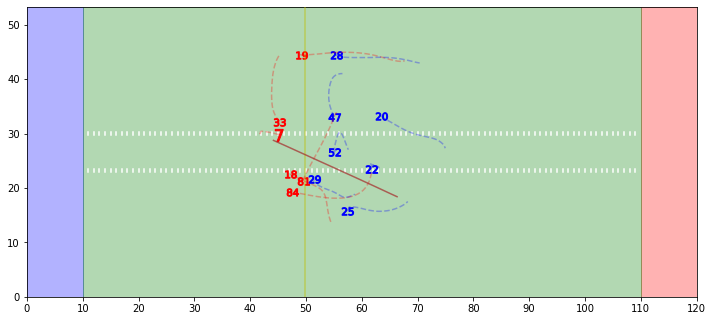

In [30]:
play.plot_play(markers='number')

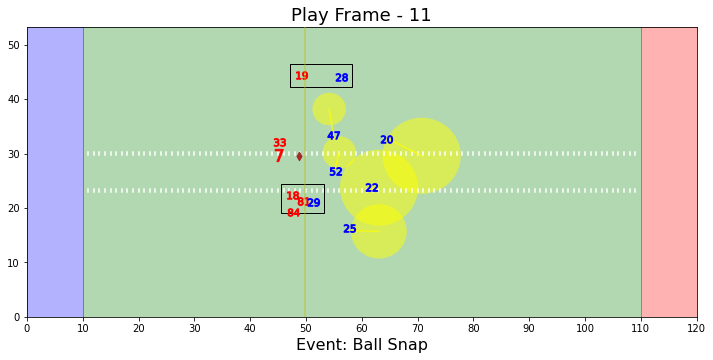

In [31]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')